In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
iris=load_iris()#cargo los datos

In [4]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=2/3,stratify=iris.target)#separo los datos

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(100, 4)
(50, 4)
(100,)
(50,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
clf=DecisionTreeClassifier()#defino el algoritmo

In [9]:
clf.fit(X_train,y_train)# entreno el modelo

DecisionTreeClassifier()

In [10]:
y_test_pred=clf.predict(X_test)#hago la predicion

In [11]:
sc=accuracy_score(y_test_pred,y_test)#puntuacion
print(sc)

0.92


In [12]:
import pandas as pd

In [13]:
juntos = pd.DataFrame(list(zip(y_test_pred, y_test)),columns =['Prediccion', 'Original'])
print(juntos)#zip junta en un iterador y empareja las muestras

    Prediccion  Original
0            0         0
1            2         2
2            0         0
3            2         2
4            1         1
5            1         1
6            2         2
7            1         1
8            1         1
9            2         1
10           2         2
11           0         0
12           2         2
13           2         2
14           2         2
15           1         1
16           1         1
17           0         0
18           2         2
19           0         0
20           0         0
21           1         1
22           1         2
23           1         1
24           1         1
25           0         0
26           2         2
27           2         2
28           0         0
29           0         0
30           1         1
31           0         0
32           2         2
33           0         0
34           1         1
35           0         0
36           2         2
37           0         0
38           0         0


In [14]:
juntos["Diferente"]=0#inserta fila con ceros

In [15]:
for i in range(len(juntos)):
    if(juntos.iloc[i]["Prediccion"]!=juntos.iloc[i]["Original"]):#recorro elementos y los comparo
        juntos.at[i,"Diferente"]=1#pongo en la celda 1

    
        

In [16]:
cantidad=len(juntos)

#agrupa por diferente y los cuenta
df2 = juntos.groupby(["Diferente"])["Diferente"].count()


In [17]:

prop=df2.iloc[0]/cantidad#divido los correctos entre todos
print("La proporcion es de: ",prop)


La proporcion es de:  0.92


In [18]:
confusion_matrix=confusion_matrix(y_test_pred,y_test)#matriz de confusion con los orginales y los de test
print(confusion_matrix)


[[17  0  0]
 [ 0 14  2]
 [ 0  2 15]]


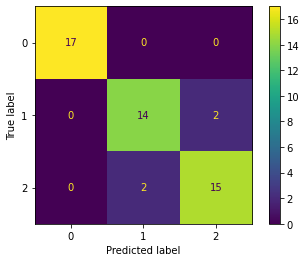

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()

In [ ]:
#fila de arriba: true positives, false positive
#fila de abajo: false negatives, true negative
#false positive: predijo true y era false
#false negative: predijo false y era true